# Exploratory Data Analysis + Preprocessing

## Libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import textwrap
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.display import display

from typing import List, Dict, Tuple, Optional

## Read Database

In [2]:
## Connect Database
db_file = "n1_data_ops_challenge.db"
connection = sqlite3.connect(db_file)
cur = connection.cursor()

## Fetch table
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]    
print(f"Tables: {table_list}")

Tables: [('model_scores_by_zip',), ('roster_1',), ('roster_2',), ('roster_3',), ('roster_4',), ('roster_5',), ('std_member_info',)]


In [3]:
cur.execute("""
    DROP TABLE IF EXISTS std_member_info;
""")

In [4]:
## Load data into Pandas
roster_1 = pd.read_sql_query("SELECT * FROM roster_1;", connection)
roster_2 = pd.read_sql_query("SELECT * FROM roster_2;", connection)
roster_3 = pd.read_sql_query("SELECT * FROM roster_3;", connection)
roster_4 = pd.read_sql_query("SELECT * FROM roster_4;", connection)
roster_5 = pd.read_sql_query("SELECT * FROM roster_5;", connection)
model_scores = pd.read_sql_query("SELECT * FROM model_scores_by_zip;", connection)

---

## Table Exploration

In [5]:
## model_scores insight
model_scores.describe()

,zcta,state_code,neighborhood_stress_score,algorex_sdoh_composite_score,social_isolation_score,transportation_access_score,food_access_score,unstable_housing_score,state_govt_assistance,homeless_indicator,derived_indicator
count,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,93662.508523,6.0,-0.062892,6.427369,3.071813,4.238028,3.159642,2.638472,0.586636,7.162500,0.094886
std,1816.789712,0.0,0.690468,0.461369,0.803491,0.589008,0.801018,1.075871,0.541709,3.006486,0.293141
min,90001.000000,6.0,-1.410000,4.300000,0.000000,2.710000,0.280000,0.200000,0.000000,2.000000,0.000000
25%,92257.750000,6.0,-0.550000,6.117500,2.450000,3.880000,2.730000,1.970000,0.250000,4.000000,0.000000
50%,93656.500000,6.0,-0.210000,6.370000,2.920000,4.180000,3.210000,2.610000,0.440000,8.000000,0.000000
75%,95380.500000,6.0,0.290000,6.670000,3.600000,4.490000,3.700000,3.090000,0.770000,10.000000,0.000000
max,96161.000000,6.0,6.120000,8.770000,8.330000,8.750000,6.900000,7.880000,7.500000,10.000000,1.000000


In [6]:
## model_scores samples
model_scores.head(5)

,zcta,state_code,state name,neighborhood_stress_score,algorex_sdoh_composite_score,social_isolation_score,transportation_access_score,food_access_score,unstable_housing_score,state_govt_assistance,homeless_indicator,derived_indicator
0,94720,6.0,California,-0.31,6.19,2.37,3.89,3.06,2.03,0.59,10.0,1
1,95675,6.0,California,-0.31,6.18,3.75,4.42,3.90,2.76,0.33,6.0,1
2,95699,6.0,California,-0.31,6.18,3.75,4.42,3.90,2.76,0.33,6.0,1
3,95930,6.0,California,0.33,6.00,3.47,3.95,3.01,3.05,0.76,10.0,1
4,95941,6.0,California,0.33,6.00,3.47,3.95,3.01,3.05,0.76,10.0,1


In [7]:
## Roster data exploration
data = [roster_1, roster_2, roster_3, roster_4, roster_5]
print("Column Breakdown:")
for i in range(len(data)):
    label = f"Roster {i+1}"
    columns = " || ".join(sorted(list(data[i].columns)))
    wrapped = textwrap.fill(columns, width=100, subsequent_indent="\t\t")
    print(f"\t{label}: {wrapped}")

Column Breakdown:
	Roster 1: Age || City || Dob || First_Name || Gender || Last_Name || Person_Id || State || Street_Address ||
		Zip || eligibility_end_date || eligibility_start_date || payer
	Roster 2: Age || City || Dob || First_Name || Gender || Last_Name || Person_Id || State || Street_Address ||
		Zip || eligibility_end_date || eligibility_start_date || payer
	Roster 3: Age || City || Dob || First_Name || Gender || Last_Name || Person_Id || State || Street_Address ||
		Zip || eligibility_end_date || eligibility_start_date || payer
	Roster 4: Age || City || Dob || First_Name || Gender || Last_Name || Person_Id || State || Street_Address ||
		Zip || eligibility_end_date || eligibility_start_date || payer
	Roster 5: Age || City || Dob || First_Name || Gender || Last_Name || Person_Id || State || Street_Address ||
		Zip || eligibility_end_date || eligibility_start_date || payer


**All rosters have the same column schema.**

In [8]:
## Null Value Checker
print("Checking for Null values...")
for i in range(len(data)):
    label = f"Roster {i+1}"

    df = data[i]
    null_count = df.isna().sum().sum()
    total_count = df.count().sum()
    print(f"\t{label} --> {(null_count / total_count) * 100:.2f}% Null Values || {df.count().unique()[0]} Rows")

Checking for Null values...
	Roster 1 --> 0.00% Null Values || 23659 Rows
	Roster 2 --> 0.00% Null Values || 23392 Rows
	Roster 3 --> 0.00% Null Values || 34951 Rows
	Roster 4 --> 0.00% Null Values || 22900 Rows
	Roster 5 --> 0.00% Null Values || 37403 Rows


**No null value for each roster dataframe.**

### Sample Data for Roster Datasets

In [9]:
display(roster_1.head(1))
display(roster_2.head(1))
display(roster_3.head(1))
display(roster_4.head(1))
display(roster_5.head(1))

,Person_Id,First_Name,Last_Name,Dob,Age,Gender,Street_Address,State,City,Zip,eligibility_start_date,eligibility_end_date,payer
0,15340001,Daniel,Smith,2017-04-27,5,Male,1505 Alvarez Spur Suite 902,California,Lake Sharonburgh,93546,2021-08-01,2021-11-01,Madv


,Person_Id,First_Name,Last_Name,Dob,Age,Gender,Street_Address,State,City,Zip,eligibility_start_date,eligibility_end_date,payer
0,15340005,Maritza,Castellana,02/09/1979,43,Female,4097 Johnny Road,California,East Carolyntown,93206,10/01/2021,02/01/2023,Madv


,Person_Id,First_Name,Last_Name,Dob,Age,Gender,Street_Address,State,City,Zip,eligibility_start_date,eligibility_end_date,payer
0,15340053,Nathaniel,Sharkey,1925-01-26,97,Male,92776 Charles Lights Suite 296,California,East Veronica,95461,2021-12-01,2022-01-01,Mdcd


,Person_Id,First_Name,Last_Name,Dob,Age,Gender,Street_Address,State,City,Zip,eligibility_start_date,eligibility_end_date,payer
0,15340034,Amber,Smith,2000-02-01,22,Female,404 Gardner Pike Suite 348,CA,North Jefferyport,95620,2022-02-01,2022-06-01,Mdcd


,Person_Id,First_Name,Last_Name,Gender,Dob,Age,Street_Address,State,City,Zip,payer,eligibility_start_date,eligibility_end_date
0,15340012,Billy,Pacifico,Male,1989-04-03,33,6176 Nicholas Turnpike Apt. 850,California,West Dorothyburgh,90047,Mdcd,2022-04-01,2026-03-01


#### Data Type Validation
* Order of columns for `roster_5` is different from the other dataframes
  * Could be solved easily when merging - field data are still tied to column name
* Date type for `roster_2` is different from the other dataframes
  * Majority date format: `YYYY-MM-DD` --> Need extra parsing on `roster_2` before merging data
* State column for `roster_4` uses abbrieviation - different from the other dataframes
  * Parsing state abbreviation into full name solves the confusion

---

## Preprocessing

### Parse Data Appropriately

In [10]:
## Parsing function for all dates found in dataframe
def parse_date(
    data: pd.DataFrame, 
    input_format=None, 
    output_format="%Y-%m-%d", 
    errors="coerce", 
    inplace=False) -> Optional[pd.DataFrame]:

    modified_data = data if inplace else data.copy()

    for col in modified_data.columns:

        try:
            parser = pd.to_datetime(modified_data[col], format=input_format, errors=errors)
            if parser.notna().sum() > 0:
                modified_data[col] = parser.dt.strftime(output_format)
        except Exception as e:
            pass 

    return modified_data if not inplace else None

In [11]:
## Parsing function for state abbreviations

state_abbrev_to_name = { ## sourced from the internet
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

def parse_state(
    data: pd.Series,
    state_col_name: str,
    inplace=False
) -> Optional[pd.DataFrame]:

    modified_data = data if inplace else data.copy()
    try:
        modified_data[state_col_name] = modified_data[state_col_name].map(lambda s: state_abbrev_to_name[s])
    except Exception as e:
        print("No data matching column name found.")

    return modified_data if not inplace else None


In [12]:
## Parse dates in `roster_2` dataframe
parse_date(
    data=roster_2, 
    input_format="%m/%d/%Y",
    inplace=True
)
display(roster_2.head(1))

,Person_Id,First_Name,Last_Name,Dob,Age,Gender,Street_Address,State,City,Zip,eligibility_start_date,eligibility_end_date,payer
0,15340005,Maritza,Castellana,1979-02-09,43,Female,4097 Johnny Road,California,East Carolyntown,93206,2021-10-01,2023-02-01,Madv


In [13]:
## Parse states in `roster_4` dataframe
parse_state(
    data=roster_4, 
    state_col_name="State",
    inplace=True
)
display(roster_4.head(1))

,Person_Id,First_Name,Last_Name,Dob,Age,Gender,Street_Address,State,City,Zip,eligibility_start_date,eligibility_end_date,payer
0,15340034,Amber,Smith,2000-02-01,22,Female,404 Gardner Pike Suite 348,California,North Jefferyport,95620,2022-02-01,2022-06-01,Mdcd


### Exploring Data Uniqueness

In [14]:
## Create DataFrame without duplicates
roster_data = pd.concat(data, ignore_index=True)
display(roster_data.head(5))
print(f"Unified roster data shows {len(roster_data)} member records.")

## Checking duplicate pattern of data
roster_data_duplicated_ids = roster_data.Person_Id.value_counts()
roster_data_duplicated_ids = roster_data_duplicated_ids[roster_data_duplicated_ids > 1]
print(f"Count of Duplicated `Person_Id`: {roster_data_duplicated_ids.count()}")
print(f"Max. Occurence of Duplicated `Person_Id`: {roster_data_duplicated_ids.max()}")

,Person_Id,First_Name,Last_Name,Dob,Age,Gender,Street_Address,State,City,Zip,eligibility_start_date,eligibility_end_date,payer
0,15340001,Daniel,Smith,2017-04-27,5,Male,1505 Alvarez Spur Suite 902,California,Lake Sharonburgh,93546,2021-08-01,2021-11-01,Madv
1,15340006,Todd,Austin,1934-01-06,88,Male,4731 Howe Ridge,California,New Rachel,95451,2021-08-01,2023-08-01,Madv
2,15340022,Leroy,Wilson,1960-09-20,62,Male,9710 Brianna Trail Apt. 145,California,Port Meredith,92222,2021-08-01,2024-01-01,Mdcd
3,15340042,Monica,Elmquist,1981-09-02,41,Female,47630 Sampson Throughway Suite 673,California,North Desireetown,95471,2021-08-01,2025-10-01,Mdcd
4,15340052,Betty,Read,1977-09-23,45,Female,78146 Angelica Lights Suite 526,California,Williambury,95018,2021-08-01,2024-08-01,Madv


Unified roster data shows 142305 member records.
Count of Duplicated `Person_Id`: 24620
Max. Occurence of Duplicated `Person_Id`: 2


### Verify Duplicate `Person_Id` Conditions 
Questions: 
1. Does the data include multiple eligibility period data? Aka. would a member has 2 or more rows of valid data? 

In [15]:
roster_data["eligibility_start_date"] = pd.to_datetime(roster_data["eligibility_start_date"])
roster_data["eligibility_end_date"] = pd.to_datetime(roster_data["eligibility_end_date"])

roster_data_with_duplicate_id = roster_data.loc[roster_data["Person_Id"].isin(list(roster_data_duplicated_ids.keys()))].sort_values(by=["Person_Id", "eligibility_start_date"])
display(roster_data_with_duplicate_id.head(10))
print(f"Sorted roster data that consists of duplicate `Person_Id`")

,Person_Id,First_Name,Last_Name,Dob,Age,Gender,Street_Address,State,City,Zip,eligibility_start_date,eligibility_end_date,payer
35552,15340010,Jimmy,Clark,1926-07-16,96,Male,9763 Cynthia Vista Suite 910,California,Lake Morgan,96096,2021-11-01,2025-08-01,Mdcd
135469,15340010,Jimmy,Clark,1926-07-16,96,Male,9763 Cynthia Vista Suite 910,California,Lake Morgan,96096,2021-11-01,2025-08-01,Mdcd
23660,15340011,Cynthia,Baker,1959-07-12,63,Female,55537 Ramos Drive,California,Kimberlymouth,95838,2021-10-01,2022-10-01,Madv
128530,15340011,Cynthia,Baker,1959-07-12,63,Female,55537 Ramos Drive,California,Kimberlymouth,95838,2021-10-01,2022-10-01,Madv
35553,15340029,Rosa,Charles,1946-10-13,76,Female,270 Rebecca Divide,California,East Robertchester,96058,2021-11-01,2023-04-01,Madv
135470,15340029,Rosa,Charles,1946-10-13,76,Female,270 Rebecca Divide,California,East Robertchester,96058,2021-11-01,2023-04-01,Madv
71157,15340034,Amber,Smith,2000-02-01,22,Female,404 Gardner Pike Suite 348,California,North Jefferyport,95620,2022-02-01,2022-06-01,Mdcd
82002,15340034,Amber,Smith,2000-02-01,22,Female,404 Gardner Pike Suite 348,California,North Jefferyport,95620,2022-02-01,2022-06-01,Mdcd
35554,15340059,Ruthie,Cain,1968-03-12,54,Female,432 Corey Canyon,California,East Suzanneside,94521,2021-11-01,2021-12-01,Madv
135471,15340059,Ruthie,Cain,1968-03-12,54,Female,432 Corey Canyon,California,East Suzanneside,94521,2021-11-01,2021-12-01,Madv


Sorted roster data that consists of duplicate `Person_Id`


In [16]:
## Filter rows with exact duplicate of data
duplicate_mask = roster_data_with_duplicate_id.duplicated(keep=False)
duplicated_roster_unique = roster_data_with_duplicate_id[~duplicate_mask].sort_values(by="Person_Id")

display(duplicated_roster_unique.head(10))
print(f"Within the duplicated member records, {len(duplicated_roster_unique)} rows / {len(duplicated_roster_unique["Person_Id"].unique())} members are not complete duplicates.")

,Person_Id,First_Name,Last_Name,Dob,Age,Gender,Street_Address,State,City,Zip,eligibility_start_date,eligibility_end_date,payer


Within the duplicated member records, 0 rows / 0 members are not complete duplicates.


**0 member is not complete duplicates (each field is the same from past entry) - meaning that each member only has 1 eligibility period**

**So we just have to remove duplicate records.**

### Continued: Ensure no row is complete duplicate

In [17]:
## Make unique member records with `Person_Id` as identifier column
roster_data = roster_data.drop_duplicates()
display(roster_data.head(5))

,Person_Id,First_Name,Last_Name,Dob,Age,Gender,Street_Address,State,City,Zip,eligibility_start_date,eligibility_end_date,payer
0,15340001,Daniel,Smith,2017-04-27,5,Male,1505 Alvarez Spur Suite 902,California,Lake Sharonburgh,93546,2021-08-01,2021-11-01,Madv
1,15340006,Todd,Austin,1934-01-06,88,Male,4731 Howe Ridge,California,New Rachel,95451,2021-08-01,2023-08-01,Madv
2,15340022,Leroy,Wilson,1960-09-20,62,Male,9710 Brianna Trail Apt. 145,California,Port Meredith,92222,2021-08-01,2024-01-01,Mdcd
3,15340042,Monica,Elmquist,1981-09-02,41,Female,47630 Sampson Throughway Suite 673,California,North Desireetown,95471,2021-08-01,2025-10-01,Mdcd
4,15340052,Betty,Read,1977-09-23,45,Female,78146 Angelica Lights Suite 526,California,Williambury,95018,2021-08-01,2024-08-01,Madv


**There are 117685 rows of member data.**

In [18]:
## Export Data As Table in DB + Check if member_id is unique
member_info_data = roster_data.rename(columns={
    "Person_Id": "member_id", 
    "First_Name": "member_first_name",
    "Last_Name": "member_last_name",
    "Dob": "date_of_birth",
    "Zip": "zip_code",
    "City": "city",
    "State": "state",
    "Street_Address": "main_address",
}).drop(columns=["Age", "Gender"])
print(f"Count of members (unique member ID): {len(member_info_data["member_id"])}")

Count of members (unique member ID): 117685


### Short Summary
**No duplicate is found now. All member IDs are unique and belong to one specific member.**

**All the duplicate cases are complete duplicates - so no member has multiple valid data records.**

### Filter eligibility to 2025 only

In [19]:
member_info_data["eligibility_start_date"], member_info_data["eligibility_end_date"] = (
    pd.to_datetime(member_info_data["eligibility_start_date"]),
    pd.to_datetime(member_info_data["eligibility_end_date"])
)

start_2025 = pd.Timestamp("2025-01-01")
end_2025 = pd.Timestamp("2025-12-31")

def overlaps_2025(row):
    return (row["eligibility_start_date"] <= end_2025) and (row["eligibility_end_date"] >= start_2025)

member_info_data = member_info_data[member_info_data.apply(overlaps_2025, axis=1)]
member_info_data

,member_id,member_first_name,member_last_name,date_of_birth,main_address,state,city,zip_code,eligibility_start_date,eligibility_end_date,payer
3,15340042,Monica,Elmquist,1981-09-02,47630 Sampson Throughway Suite 673,California,North Desireetown,95471,2021-08-01,2025-10-01,Mdcd
5,15340055,Wilber,Williams,1960-03-15,500 Perez Turnpike,California,West Julie,95922,2021-08-01,2025-05-01,Mdcd
12,15340256,Theresa,Quintero,1947-04-26,870 Gomez Gateway,California,Burketown,95324,2021-08-01,2025-08-01,Madv
14,15340322,Kimberly,Lynch,2019-07-03,66925 Reilly Light Suite 077,California,Michaelburgh,90049,2021-08-01,2026-04-01,Mdcd
20,15340477,Duane,Perez,1987-01-15,329 Courtney Village,California,East Norman,92606,2021-08-01,2026-01-01,Madv
...,...,...,...,...,...,...,...,...,...,...,...
128524,15539900,Randy,Mares,1979-09-17,33857 Ashley Union,California,Lake Keithtown,95975,2022-05-01,2025-05-01,Mdcd
128525,15539946,John,Koslow,1956-05-29,7193 Jones Springs,California,Davidton,94965,2022-05-01,2025-09-01,Mdcd
128527,15539956,Velma,Roberts,1946-12-05,696 Martinez Glens Apt. 644,California,East Marcusborough,95521,2022-05-01,2025-11-01,Mdcd
128528,15539980,Antonio,Necaise,1943-09-02,74800 Michele Brook,California,Matthewschester,93442,2022-05-01,2025-06-01,Mdcd


In [20]:
## Check final parsed data
member_info_data.head(5)

,member_id,member_first_name,member_last_name,date_of_birth,main_address,state,city,zip_code,eligibility_start_date,eligibility_end_date,payer
3,15340042,Monica,Elmquist,1981-09-02,47630 Sampson Throughway Suite 673,California,North Desireetown,95471,2021-08-01,2025-10-01,Mdcd
5,15340055,Wilber,Williams,1960-03-15,500 Perez Turnpike,California,West Julie,95922,2021-08-01,2025-05-01,Mdcd
12,15340256,Theresa,Quintero,1947-04-26,870 Gomez Gateway,California,Burketown,95324,2021-08-01,2025-08-01,Madv
14,15340322,Kimberly,Lynch,2019-07-03,66925 Reilly Light Suite 077,California,Michaelburgh,90049,2021-08-01,2026-04-01,Mdcd
20,15340477,Duane,Perez,1987-01-15,329 Courtney Village,California,East Norman,92606,2021-08-01,2026-01-01,Madv


In [21]:
member_info_data.describe()

,eligibility_start_date,eligibility_end_date
count,39252,39252
mean,2021-12-20 23:20:02.934882304,2025-09-10 10:41:00.898807552
min,2021-08-01 00:00:00,2025-01-01 00:00:00
25%,2021-10-01 00:00:00,2025-05-01 00:00:00
50%,2022-01-01 00:00:00,2025-09-01 00:00:00
75%,2022-03-01 00:00:00,2026-02-01 00:00:00
max,2022-05-01 00:00:00,2026-06-01 00:00:00


In [22]:
member_info_data.payer.unique()

array(['Mdcd', 'Madv'], dtype=object)

**Observations**
* Only one state -> *California*
* Only 2 payer types -> *Madv*, *Mdcd*

---

## Create Table in DB

In [23]:
member_info_data.to_sql("std_member_info", connection, if_exists="replace")

39252

In [24]:
## Fetch table
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]    
print(f"Tables: {table_list}")

Tables: [('model_scores_by_zip',), ('roster_1',), ('roster_2',), ('roster_3',), ('roster_4',), ('roster_5',), ('std_member_info',)]


In [25]:
connection.close()

## Extra Considerations \[Parsing Unseen Data\]

| Column Name |                      Anticipated Issues                      |
| ----------- | ------------------------------------------------------------ |
|  member_id  | <ul><li>Already existed in the dataset -> Identifier column: values have to be unique</li><li>(Assume `member_id` requires number only) Consist of only numbers</li></ul> |
|  member_first_name | <ul><li>**NO Punctuation or Number**</li></ul> |
|  member_last_name | <ul><li>**NO Punctuation or Number**</li></ul> |
|  date_of_birth | <ul><li style="color:gray">Date format follows the defaults: `%Y-%m-%d`</li><li>Too long ago -> Potentially invalid</li></ul> |
|  main_address | <ul><li>(Assume data encapsulates only the US) Follows US address format</li></ul> |
|  state \[category\] | <ul><li>**NO Punctuation or Number**</li><li>Matching one of the 51 state names</li><li style="color:gray">Parse abbreviations</li></ul> |
|  city | <ul><li>**NO Punctuation or Number**</li></ul> |
|  zip_code | <ul><li>Consist of 5 digits</li><li>Consist of numbers only</li></ul> |
|  eligibility_start_date | <ul><li style="color:gray">Date format follows the defaults: `%Y-%m-%d`</li></ul> |
|  eligibility_end_date | <ul><li style="color:gray">Date format follows the defaults: `%Y-%m-%d`</li></ul> |
|  payer \[category\] | <ul><li>(Assume there will be new payer category) Allow new payer type</li></ul> |


*NOTE: Gray items are encountered cases in dataset.*

---

## Number Report (Over the Complete Dataset, Not Only 2025)

### Distinct Member Eligible in April 2025

In [26]:
target_month, target_year = 4, 2025
april_start = pd.Timestamp(f"{target_year}-04-01")
april_end = pd.Timestamp(f"{target_year}-04-30")

def is_eligible(row):
    return row["eligibility_start_date"] <= april_end and row["eligibility_end_date"] >= april_start

eligible_in_april = roster_data[roster_data.apply(is_eligible, axis=1)]
display(eligible_in_april.head(5))
print(f"Number of members eligible in April 2025: {len(eligible_in_april)}")

,Person_Id,First_Name,Last_Name,Dob,Age,Gender,Street_Address,State,City,Zip,eligibility_start_date,eligibility_end_date,payer
3,15340042,Monica,Elmquist,1981-09-02,41,Female,47630 Sampson Throughway Suite 673,California,North Desireetown,95471,2021-08-01,2025-10-01,Mdcd
5,15340055,Wilber,Williams,1960-03-15,62,Male,500 Perez Turnpike,California,West Julie,95922,2021-08-01,2025-05-01,Mdcd
12,15340256,Theresa,Quintero,1947-04-26,75,Female,870 Gomez Gateway,California,Burketown,95324,2021-08-01,2025-08-01,Madv
14,15340322,Kimberly,Lynch,2019-07-03,3,Female,66925 Reilly Light Suite 077,California,Michaelburgh,90049,2021-08-01,2026-04-01,Mdcd
20,15340477,Duane,Perez,1987-01-15,35,Male,329 Courtney Village,California,East Norman,92606,2021-08-01,2026-01-01,Madv


Number of members eligible in April 2025: 32576


### Member Included More Than Once
**Count of members included more than once: 24620 (computed above when handling duplicate values)**

*NOTE: Check out **Exploring Data Uniqueness***

### Breakdown of Members by Payer

In [27]:
payer_classes = roster_data.payer.unique()
print(f"Payer types include: {payer_classes}")

Payer types include: ['Madv' 'Mdcd']


Mdcd has 73653 members.
Madv has 44032 members.


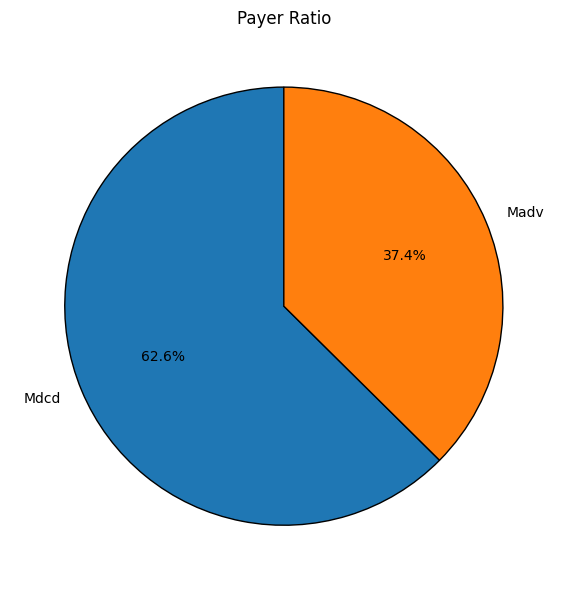

In [28]:
payer_ratio_df = roster_data['payer'].value_counts().reset_index()
payer_ratio_df.columns = ['payer', 'count']

for item in payer_ratio_df.to_dict(orient='records'):
    print(f"{item['payer']} has {item['count']} members.")

labels = payer_ratio_df['payer'].tolist()
sizes = payer_ratio_df['count'].tolist()

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)

plt.title("Payer Ratio")
plt.tight_layout()
plt.show()

In [29]:
## Import Map
zctas = gpd.read_file("./tl_2020_us_zcta520.shp")
zctas.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,35592,35592,B5,G6350,S,298552385,235989,+33.7427261,-088.0973903,"POLYGON ((-88.24735 33.6539, -88.24713 33.6541..."
1,35616,35616,B5,G6350,S,559506992,41870756,+34.7395036,-088.0193814,"POLYGON ((-88.13997 34.58184, -88.13995 34.582..."
2,35621,35621,B5,G6350,S,117838488,409438,+34.3350314,-086.7270557,"POLYGON ((-86.81659 34.3496, -86.81648 34.3496..."
3,35651,35651,B5,G6350,S,104521045,574316,+34.4609087,-087.4801507,"POLYGON ((-87.53087 34.42492, -87.53082 34.429..."
4,36010,36010,B5,G6350,S,335675180,236811,+31.6598950,-085.8128958,"POLYGON ((-85.95712 31.67744, -85.95676 31.677..."


 ===== Breakdown of Payer Madv ===== 
Population ----------------------------------------------------------------------------------- 44032
Male Population ------------------------------------------------------------------------------ 22054
Female Population ---------------------------------------------------------------------------- 21978
Gender Ratio (Male:Female) ------------------------------------------------------------------ 1:1.00


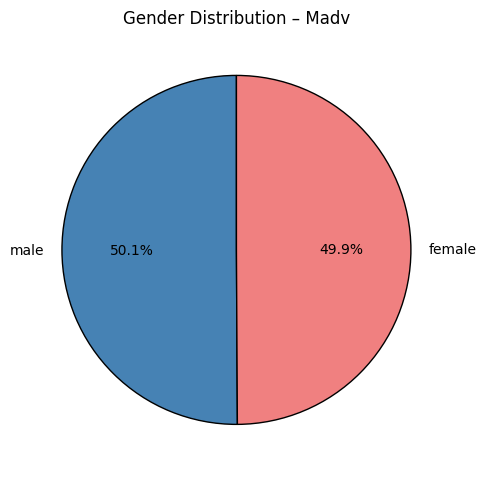

Unique City ---------------------------------------------------------------------------------- 23137
Unique State ------------------------------------------------------------------------------------- 1
Eligibility Date Range ----------------------------------- 2021-08-01 00:00:00 - 2026-06-01 00:00:00


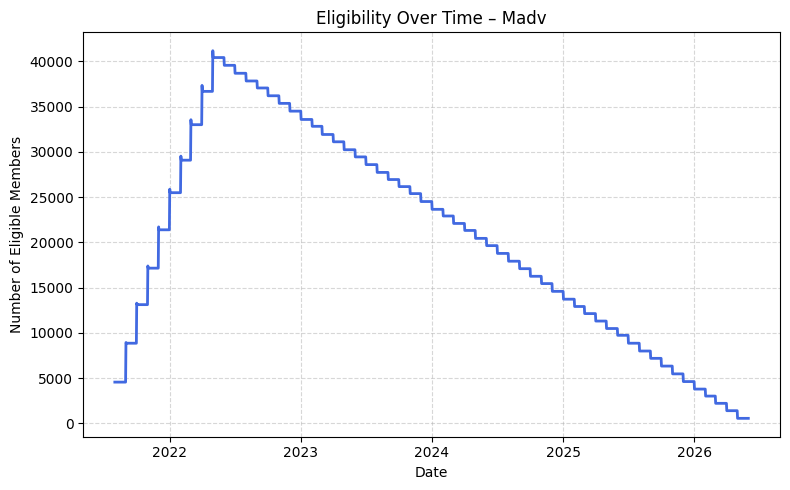

Age Range ----------------------------------------------------------------------------------- 0 - 99


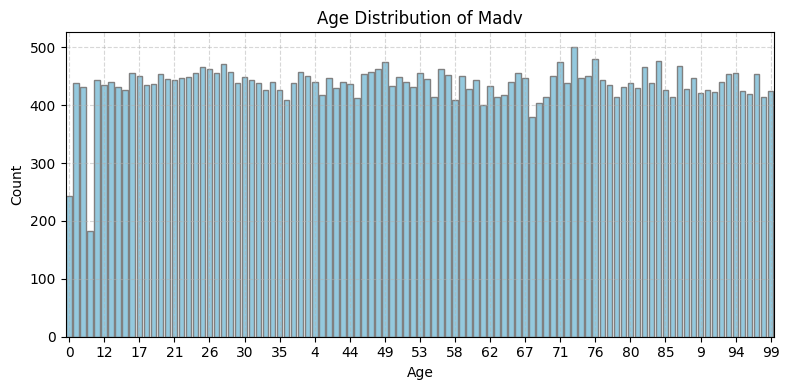

Unique Zip Code ------------------------------------------------------------------------------- 1760


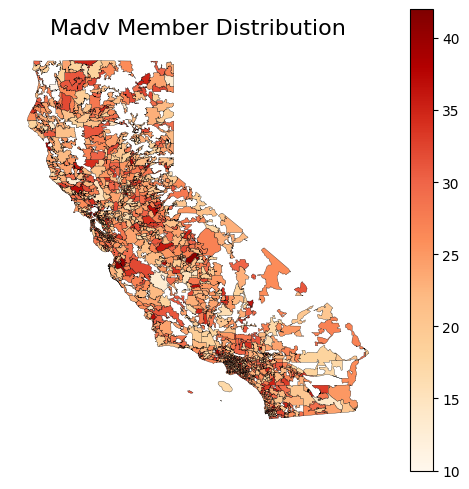

 ===== END - Payer Madv ===== 
 ===== Breakdown of Payer Mdcd ===== 
Population ----------------------------------------------------------------------------------- 73653
Male Population ------------------------------------------------------------------------------ 36982
Female Population ---------------------------------------------------------------------------- 36671
Gender Ratio (Male:Female) ------------------------------------------------------------------ 1:0.99


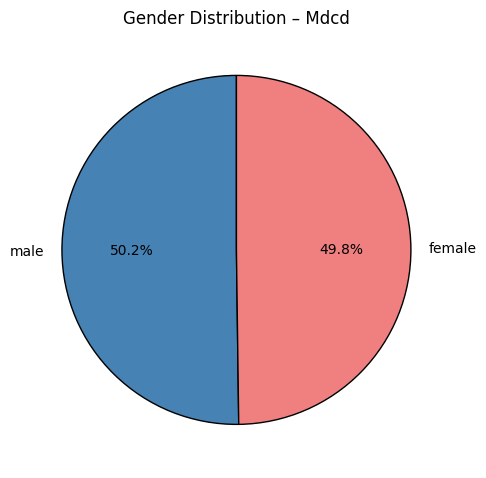

Unique City ---------------------------------------------------------------------------------- 31911
Unique State ------------------------------------------------------------------------------------- 1
Eligibility Date Range ----------------------------------- 2021-08-01 00:00:00 - 2026-06-01 00:00:00


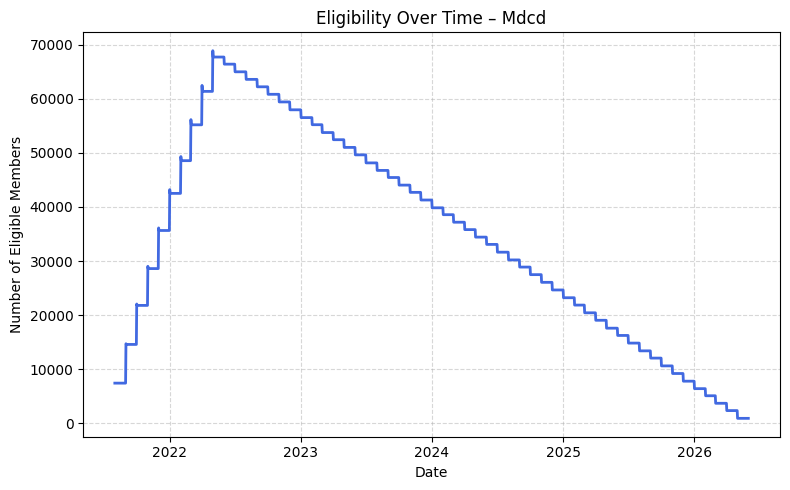

Age Range ----------------------------------------------------------------------------------- 0 - 99


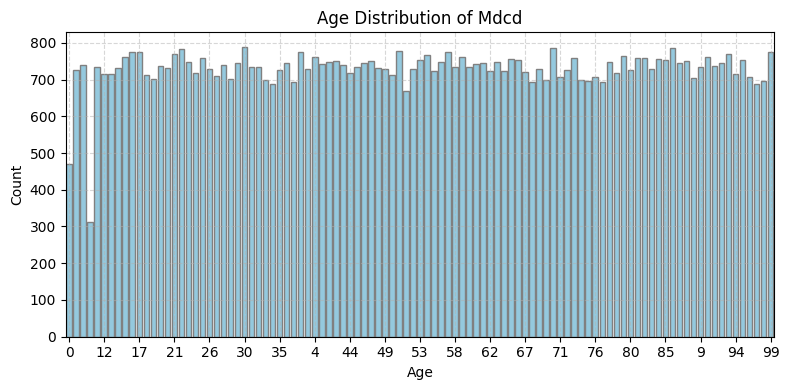

Unique Zip Code ------------------------------------------------------------------------------- 1760


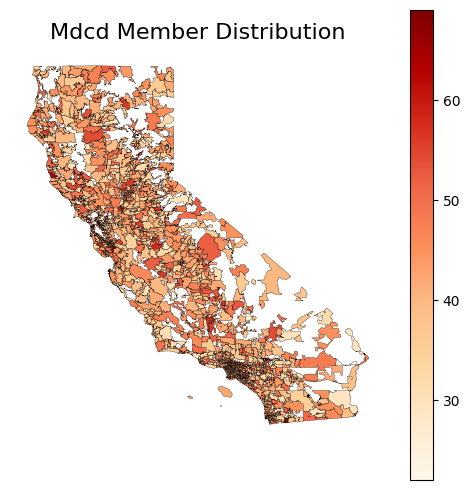

 ===== END - Payer Mdcd ===== 


In [30]:
gender_count = []                                                               # [x]
eligibility_distribution = []                                                   # [x]
unique_city = []                                                                # [x]
unique_state = []                                                               # [x] 
age_distribution = []                                                           # [x]
zcta_distribution = []                                                          # [x]
population = []                                                                 # [x]
total_width = 100

def print_stat(label: any, total_width: int = 100, value: any = ""):
    label = label.rstrip()
    value_str = str(value)
    dash_count = max(1, total_width - len(label) - len(value_str) - 2)  # -2 for spacing
    dashes = '-' * dash_count
    print(f"{label} {dashes} {value_str}")

for payer_class in payer_classes:
    print(f"\033[1m ===== Breakdown of Payer {payer_class} ===== \033[0m")


    
    ## Population Count
    pop = len(roster_data[roster_data["payer"] == payer_class])
    prefix = "Population "
    population.append(pop)
    print_stat(prefix, total_width, pop)


    
    ## Gender Ratio
    male = len(roster_data[(roster_data["payer"] == payer_class) & (roster_data["Gender"] == "Male")])
    female = len(roster_data[(roster_data["payer"] == payer_class) & (roster_data["Gender"] == "Female")])
    gender_data = {
        "male": male,
        "female": female
    }
    gender_count.append(gender_data) ## TODO: PLOT 
    print_stat("Male Population ", total_width, male)
    print_stat("Female Population ", total_width, female)
    print_stat("Gender Ratio (Male:Female) ", total_width, f"{male//male}:{female/male:.2f}")

    plt.figure(figsize=(5, 5))
    plt.pie(
        list(gender_data.values()),
        labels=list(gender_data.keys()),
        autopct="%1.1f%%",
        startangle=90,
        colors=["steelblue", "lightcoral"],
        wedgeprops={"edgecolor": "black"}
    )
    
    plt.title(f"Gender Distribution – {payer_class}")
    plt.tight_layout()
    plt.show()
    

    ## Unique City
    city = len(roster_data[roster_data["payer"] == payer_class]["City"].unique())
    prefix = "Unique City "
    unique_city.append(city)
    print_stat(prefix, total_width, city)


    
    ## Unique State
    state = len(roster_data[roster_data["payer"] == payer_class]["State"].unique())
    prefix = "Unique State "
    unique_state.append(state)
    dash_fill = '- ' * max(0, total_width - len(str(state)) - len(prefix))
    print_stat(prefix, total_width, state)


    
    ## Eligibility (Distribution by day)
    subset = roster_data[roster_data["payer"] == payer_class]
    start_dates = pd.to_datetime(subset["eligibility_start_date"])
    end_dates = pd.to_datetime(subset["eligibility_end_date"])
    date_range = pd.date_range(start_dates.min(), end_dates.max())
    starts, ends = start_dates.values[:, None], end_dates.values[:, None]
    date_mask = (starts <= date_range.values) & (ends >= date_range.values)
    day_by_day_count = date_mask.sum(axis=0)
    eligibility_distribution.append({
        "date": date_range.values,
        "counts": day_by_day_count
    }) ## TODO: PLOT
    print_stat(f"Eligibility Date Range ", total_width, f"{str(date_range.min())} - {str(date_range.max())}")

    plt.figure(figsize=(8, 5))
    plt.plot(date_range, day_by_day_count, color="royalblue", linewidth=2)
    plt.title(f"Eligibility Over Time – {payer_class}")
    plt.xlabel("Date")
    plt.ylabel("Number of Eligible Members")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    
    ## Age 
    age_counts = roster_data[roster_data["payer"] == payer_class]
    age_counts = (
        age_counts["Age"]
        .value_counts()
        .reset_index()
        .sort_values("Age")  
    )

    age_distribution.append(age_counts) ## TODO: PLOT
    print_stat(f"Age Range ", total_width, f"{roster_data["Age"].min()} - {roster_data["Age"].max()}")

    plt.figure(figsize=(8, 4))
    sns.barplot(data=age_counts, x="Age", y="count", color="skyblue", edgecolor="gray")
    plt.title(f"Age Distribution of {payer_class}")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.tight_layout()
    plt.show()

    
    ## ZCTA
    zipcode_counts = (
        roster_data[roster_data["payer"] == payer_class]["Zip"]
        .value_counts()
        .reset_index()
    )
    merged_zip = zctas.merge(zipcode_counts, how="left", left_on="ZCTA5CE20", right_on="Zip")
    zcta_distribution.append(merged_zip.to_dict(orient='records')) ## TODO: PLOT
    print_stat(f"Unique Zip Code ", total_width, len(zipcode_counts.Zip.unique()))

    fig, ax = plt.subplots(figsize=(5, 5))
    merged_zip.plot(
        column='count',
        cmap='OrRd',
        linewidth=0.2,
        edgecolor='black',
        legend=True,
        ax=ax
    )
    ax.set_title(f"{payer_class} Member Distribution", fontsize=16)
    ax.axis("off")
    plt.tight_layout()
    plt.show()

    
    print(f"\033[1m ===== END - Payer {payer_class} ===== \033[0m")
    


### Members living in Zip Code Area with `Food Access Score` < 2

In [31]:
roster_data["Zip"] = roster_data["Zip"].astype(str).str.zfill(5)
model_scores["zcta"] = model_scores["zcta"].astype(str).str.zfill(5)
aggregator = roster_data.merge(model_scores, how="left", left_on="Zip", right_on="zcta")

In [32]:
## Filter
low_food_access_members = aggregator[aggregator["food_access_score"] < 2]
print(f"Count of Low Food Access Member (Living in Zip w/ Low Food Access Score: {len(low_food_access_members)}")

Count of Low Food Access Member (Living in Zip w/ Low Food Access Score: 9071


### Average Social Isolation Score

In [33]:
average_siscore = aggregator.social_isolation_score.sum() / len(aggregator)
print(f"Average Social Isolation Score for All Members: {average_siscore:.2f}")

Average Social Isolation Score for All Members: 3.07


### Members in Zip Code with Highest Algorex SDOH Composite Score

In [34]:
## Higher Algorex SDOH Composite Score
highest_score = aggregator.algorex_sdoh_composite_score.max()
print(f"Highest Algorex SDOH Composite Score: {highest_score}")

Highest Algorex SDOH Composite Score: 8.77


In [35]:
member_in_high_SDOH = aggregator[aggregator.algorex_sdoh_composite_score == highest_score]
score_columns = aggregator.filter(regex="_score").columns.to_list()
member_in_high_SDOH.drop(columns=score_columns, inplace=False)
member_in_high_SDOH

,Person_Id,First_Name,Last_Name,Dob,Age,Gender,Street_Address,State,City,Zip,...,state name,neighborhood_stress_score,algorex_sdoh_composite_score,social_isolation_score,transportation_access_score,food_access_score,unstable_housing_score,state_govt_assistance,homeless_indicator,derived_indicator
3840,15404143,Ruth,Engelhart,1985-12-29,36,Female,4592 Robert Crest,California,North Rachel,95950,...,California,0.77,8.77,5.0,3.66,4.78,4.95,0.0,6.0,0
4660,15418054,Albert,Delay,1986-03-13,36,Male,124 Regina Ports Apt. 256,California,Wardshire,95950,...,California,0.77,8.77,5.0,3.66,4.78,4.95,0.0,6.0,0
11862,15537550,Marie,Lund,2004-01-17,18,Female,590 Miller Plains,California,Williamsonport,95950,...,California,0.77,8.77,5.0,3.66,4.78,4.95,0.0,6.0,0
14938,15391076,Wilma,Mcauley,1924-04-11,98,Female,70237 Derek Manor,California,Amandaview,95950,...,California,0.77,8.77,5.0,3.66,4.78,4.95,0.0,6.0,0
25032,15363143,Timothy,Reed,1928-10-07,94,Male,552 Sara Mission Suite 917,California,West Victorview,95950,...,California,0.77,8.77,5.0,3.66,4.78,4.95,0.0,6.0,0
25787,15375855,Cecil,Redman,1925-05-30,97,Male,194 Sean Village Suite 890,California,West Carolhaven,95950,...,California,0.77,8.77,5.0,3.66,4.78,4.95,0.0,6.0,0
30694,15456560,Thomas,Falcon,1943-03-04,79,Male,8764 Waller Underpass Apt. 396,California,South Bethanyview,95950,...,California,0.77,8.77,5.0,3.66,4.78,4.95,0.0,6.0,0
31037,15462579,Tina,Davis,1999-09-23,23,Female,988 Brown Manor,California,New Charles,95950,...,California,0.77,8.77,5.0,3.66,4.78,4.95,0.0,6.0,0
35558,15340102,Elizabeth,Clark,1947-04-11,75,Female,572 Janet Trail,California,Tracyborough,95950,...,California,0.77,8.77,5.0,3.66,4.78,4.95,0.0,6.0,0
35973,15346807,Jeremy,Shelpman,1947-08-31,74,Male,901 Deborah Square,California,Nicholasborough,95950,...,California,0.77,8.77,5.0,3.66,4.78,4.95,0.0,6.0,0


**Highest Algorex SDOH Composite Score only happens at 95950 zipcode.**